In [ ]:
#Plotting libraries:
from __future__ import division, print_function
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch


import pandas as pd
import numpy as np

#sklearn library:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from datetime import datetime
import os, sys
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.python.client import device_lib


# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras


#gemerate array from csv:
from numpy import genfromtxt

#randomly select images from a direcetory:
import os, random

#Import tqdm for progress bar
from tqdm import tqdm

import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/Internships/UKAEA Internship/data'

/content/drive/My Drive/Internships/UKAEA Internship/data


In [ ]:
import glob
data = glob.glob('/content/drive/My Drive/Internships/UKAEA Internship/data' + '/*.csv')

In [ ]:
data.sort()
print(data)


['/content/drive/My Drive/Internships/UKAEA Internship/data/block_0.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_01.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_02.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_03.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_04.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_05.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_06.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_07.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_08.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_09.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_10.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_11.csv', '/content/drive/My Drive/Internships/UKAEA Internship/data/block_12.csv', '/content/drive/My Drive/Internships/U

In [ ]:

tot_data = []

for i in data:
  single_time = pd.read_csv(i, delimiter = ',')


  tot_data.append(single_time)


t_d = np.stack(tot_data)

In [ ]:
print(t_d)

[[[ 0.00e+00 -5.00e-01 -5.00e-01 ...  1.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00 -5.00e-01 -5.00e-01 ...  2.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00 -5.00e-01 -3.00e-01 ...  3.00e+00  0.00e+00  0.00e+00]
  ...
  [ 0.00e+00  5.00e-01  1.50e+00 ...  4.30e+02  0.00e+00  0.00e+00]
  [ 0.00e+00  5.00e-01  1.50e+00 ...  4.31e+02  0.00e+00  0.00e+00]
  [ 0.00e+00  5.00e-01  1.50e+00 ...  4.32e+02  0.00e+00  0.00e+00]]

 [[ 1.00e-01 -5.00e-01 -5.00e-01 ...  1.00e+00  0.00e+00  0.00e+00]
  [ 1.00e-01 -5.00e-01 -5.00e-01 ...  2.00e+00  0.00e+00  0.00e+00]
  [ 1.00e-01 -5.00e-01 -3.00e-01 ...  3.00e+00  0.00e+00  0.00e+00]
  ...
  [ 1.00e-01  5.00e-01  1.50e+00 ...  4.30e+02  0.00e+00  0.00e+00]
  [ 1.00e-01  5.00e-01  1.50e+00 ...  4.31e+02  0.00e+00  0.00e+00]
  [ 1.00e-01  5.00e-01  1.50e+00 ...  4.32e+02  0.00e+00  0.00e+00]]

 [[ 2.00e-01 -5.00e-01 -5.00e-01 ...  1.00e+00  0.00e+00  0.00e+00]
  [ 2.00e-01 -5.00e-01 -5.00e-01 ...  2.00e+00  0.00e+00  0.00e+00]
  [ 2.00e-01 -5.00e-01 -3.00e-01

In [ ]:
print(np.size(t_d))
print(np.shape(t_d))

ts_press = []  #pressure time series at a specific coord.
ts_time=[]

for i in range(1,31):
  p = (t_d[i])[513][4]
  t = (t_d[i])[513][0]

  ts_press.append(p)
  ts_time.append(t)


print(ts_press)
print(ts_time)

ts_press2 = []  #pressure time series at a specific coord.
ts_time2=[]


for i in range(1,31):
  p = (t_d[i])[538][4]
  t = (t_d[i])[538][0]

  ts_press2.append(p)
  ts_time2.append(t)

196416
(31, 576, 11)
[1286.2, 1298.3, 1310.4, 1298.5, 1286.5, 1298.4, 1310.2, 1298.5, 1286.8, 1298.4, 1310.0, 1298.5, 1287.1, 1298.5, 1309.9, 1298.5, 1287.0, 1298.5, 1310.0, 1298.5, 1286.9, 1298.5, 1310.0, 1298.5, 1286.9, 1298.5, 1310.1, 1298.5, 1286.9, 1298.5]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]


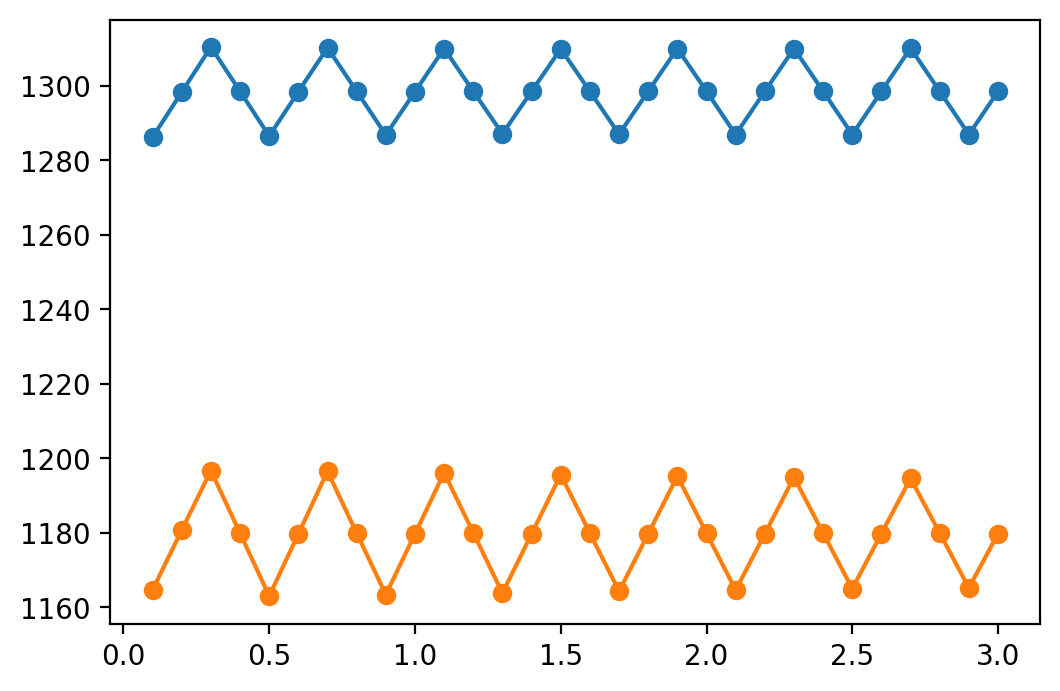

In [ ]:
plt.figure()
plt.plot(ts_time,  ts_press, '-o')
plt.plot(ts_time2,  ts_press2, '-o')

In [ ]:
print(np.size(t_d))
print(np.shape(t_d))

ts_disx = []
ts_disy = []
ts_disz = [] #pressure time series at a specific coord.
ts_time=[]


for i in range(1,31):
  px = (t_d[i])[50][5]
  py = (t_d[i])[50][6]
  pz = (t_d[i])[50][7]
  t = (t_d[i])[50][0]

  ts_disx.append(px)
  ts_disy.append(py)
  ts_disz.append(pz)

  ts_time.append(t)


print(ts_disx)
print(ts_disy)
print(ts_disz)

print(ts_time)








print(np.size(t_d))
print(np.shape(t_d))

ts_disx2 = []
ts_disy2 = []
ts_disz2 = [] #pressure time series at a specific coord.
ts_time=[]


for i in range(1,31):
  px = (t_d[i])[200][5]
  py = (t_d[i])[200][6]
  pz = (t_d[i])[200][7]
  t = (t_d[i])[200][0]

  ts_disx2.append(px)
  ts_disy2.append(py)
  ts_disz2.append(pz)

  ts_time.append(t)


print(ts_disx2)
print(ts_disy2)
print(ts_disz2)

print(ts_time)



196416
(31, 576, 11)
[-9.0773e-09, -9.1733e-09, -9.2694e-09, -9.1496e-09, -9.0299e-09, -9.1736e-09, -9.3174e-09, -9.1607e-09, -9.0039e-09, -9.172e-09, -9.3401e-09, -9.1612e-09, -8.9823e-09, -9.168e-09, -9.3537e-09, -9.1652e-09, -8.9767e-09, -9.1675e-09, -9.3582e-09, -9.166e-09, -8.9737e-09, -9.1667e-09, -9.3596e-09, -9.1667e-09, -8.9738e-09, -9.166e-09, -9.3583e-09, -9.1672e-09, -8.9761e-09, -9.1658e-09]
[-1.6663e-07, -1.6669e-07, -1.6674e-07, -1.6672e-07, -1.667e-07, -1.6673e-07, -1.6675e-07, -1.6672e-07, -1.6669e-07, -1.6673e-07, -1.6676e-07, -1.6672e-07, -1.6668e-07, -1.6673e-07, -1.6677e-07, -1.6672e-07, -1.6667e-07, -1.6673e-07, -1.6678e-07, -1.6672e-07, -1.6667e-07, -1.6673e-07, -1.6679e-07, -1.6672e-07, -1.6666e-07, -1.6673e-07, -1.6679e-07, -1.6672e-07, -1.6665e-07, -1.6673e-07]
[9.1775e-09, 9.0284e-09, 8.8792e-09, 9.1603e-09, 9.4413e-09, 9.1567e-09, 8.8722e-09, 9.153e-09, 9.4338e-09, 9.1597e-09, 8.8856e-09, 9.1507e-09, 9.4158e-09, 9.1586e-09, 8.9013e-09, 9.1523e-09, 9.4033e-09

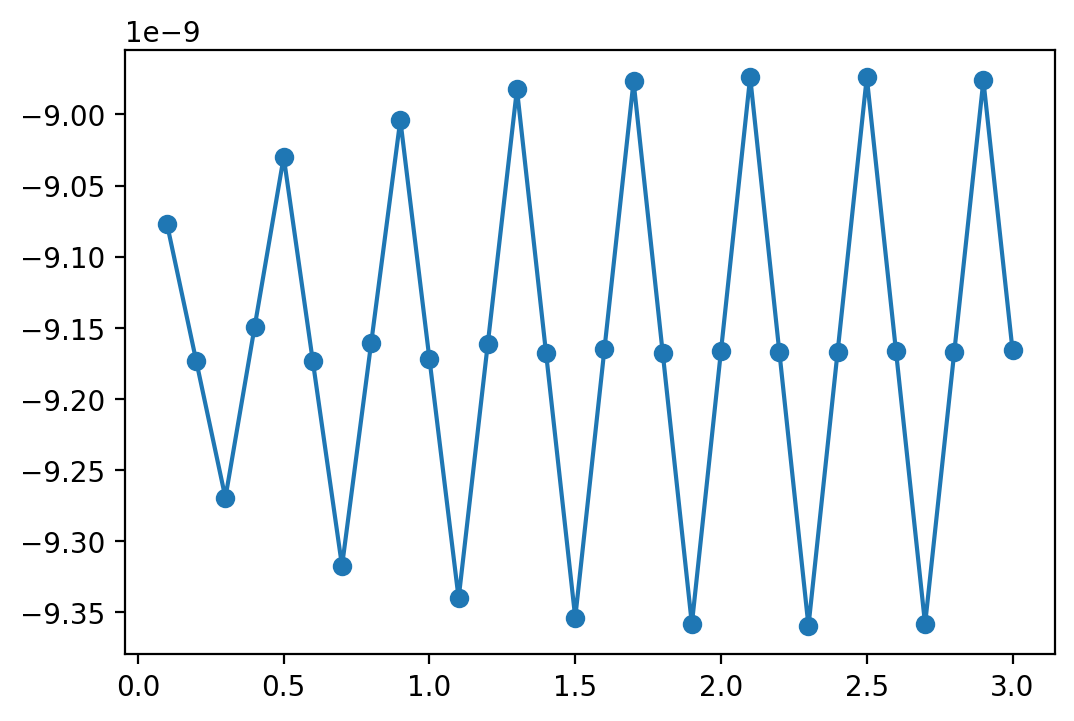

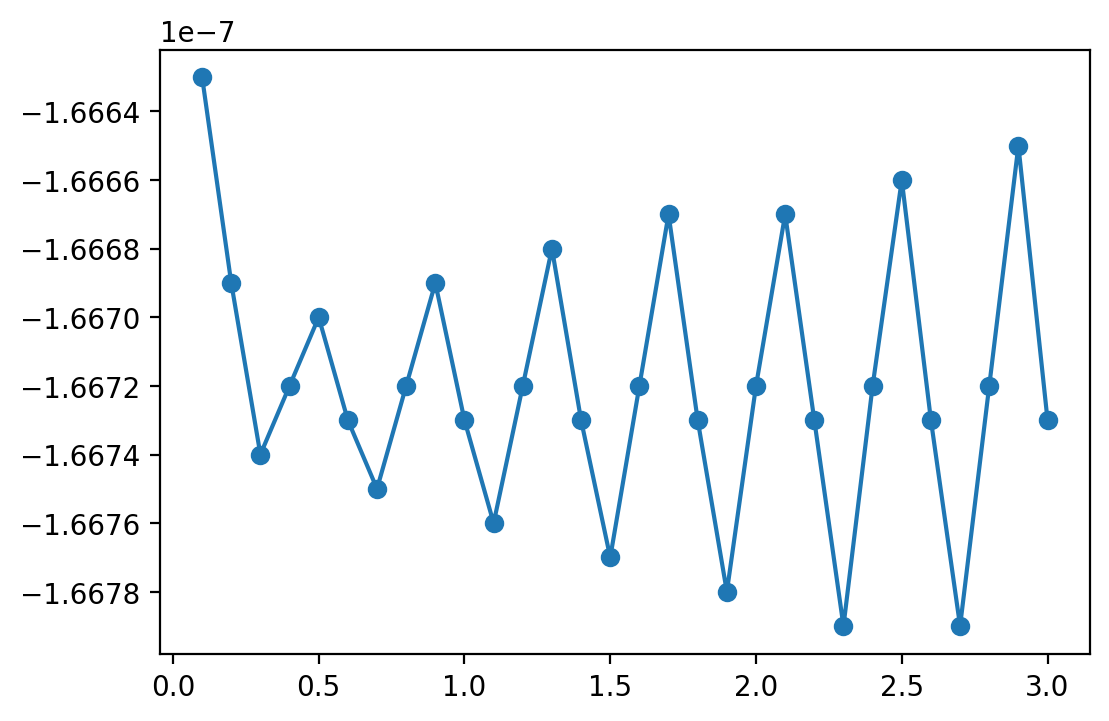

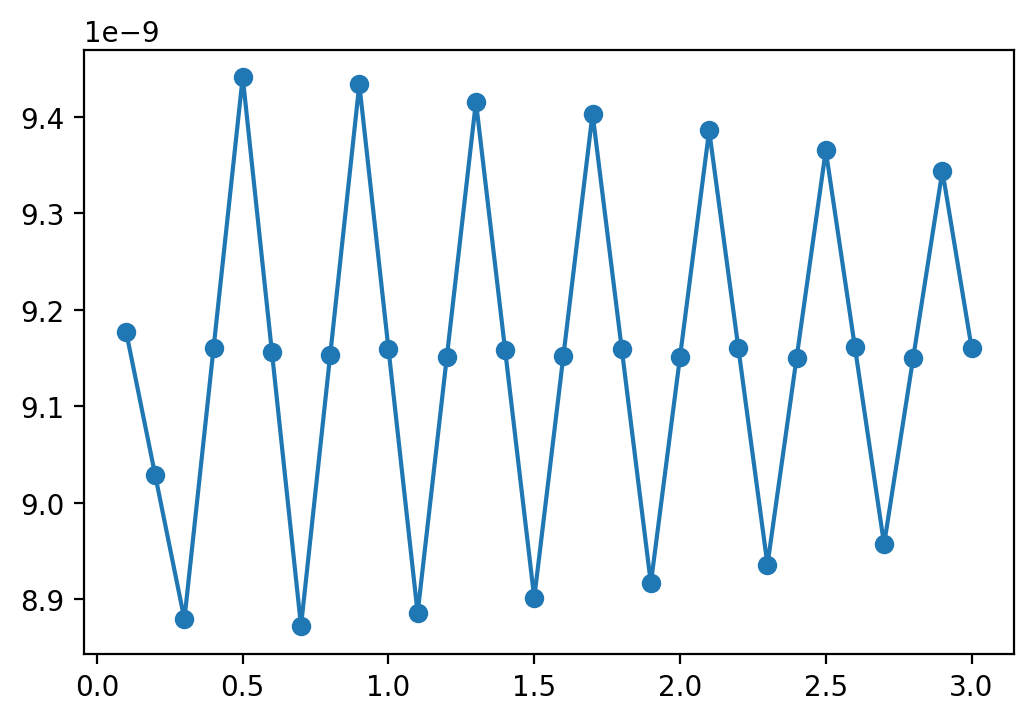

In [ ]:
plt.figure()
plt.plot(ts_time,  ts_disx, '-o')
plt.show()
plt.plot(ts_time,  ts_disy, '-o')
plt.show()
plt.plot(ts_time2,  ts_disz, '-o')

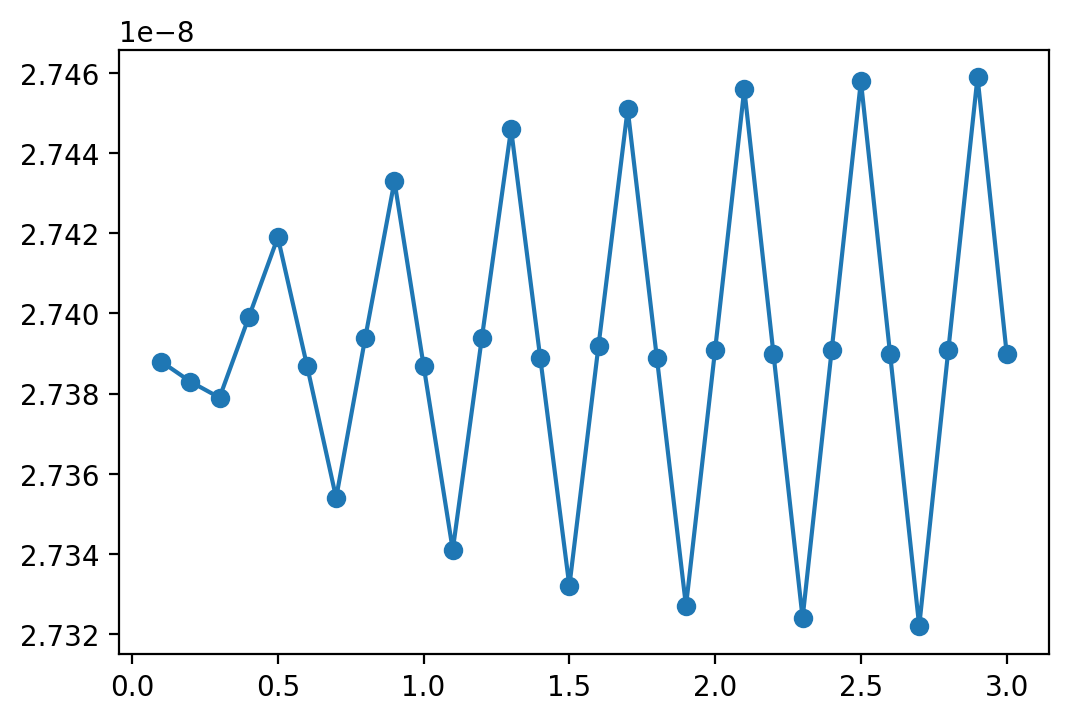

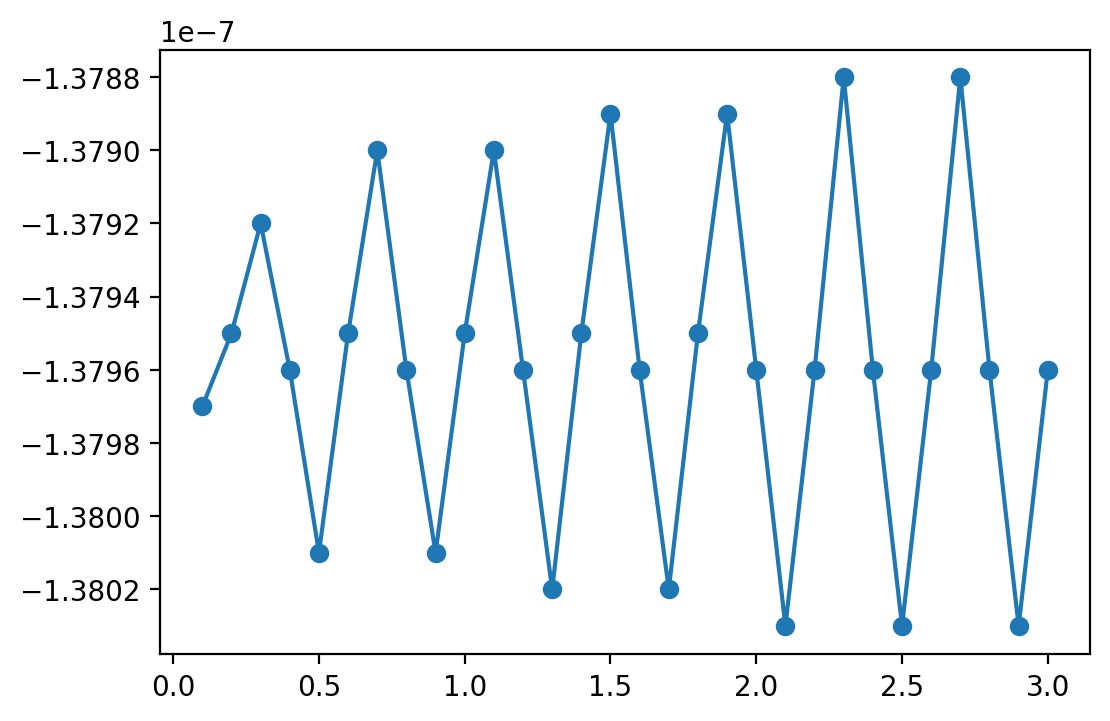

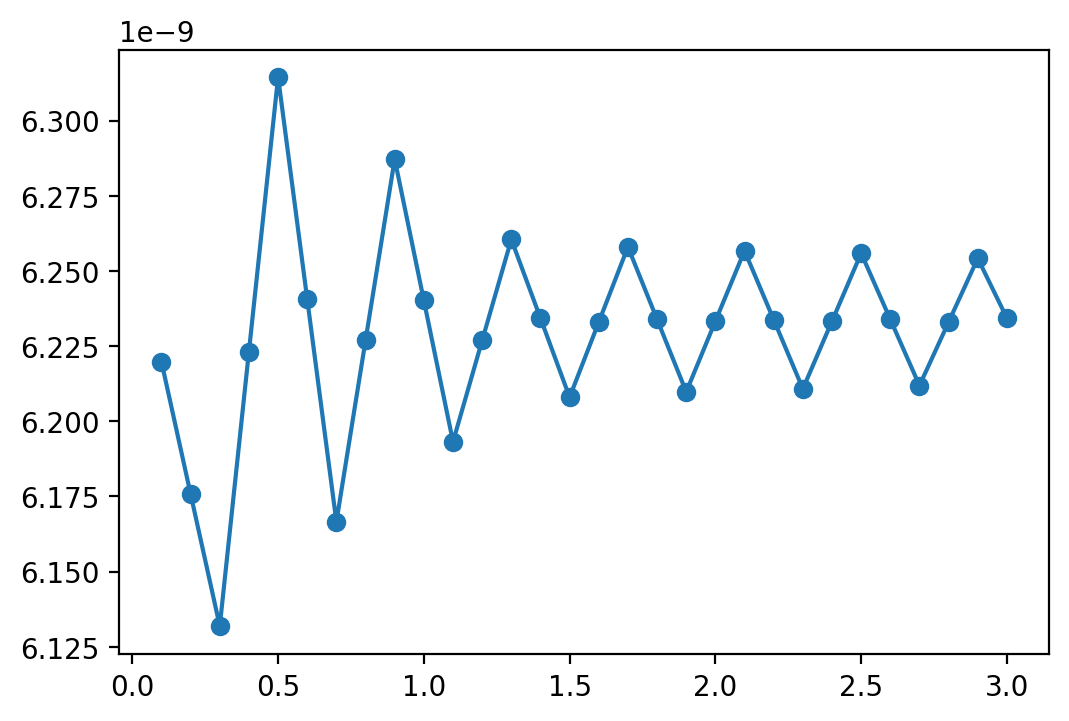

In [ ]:


plt.figure()
plt.plot(ts_time,  ts_disx2, '-o')
plt.show()
plt.plot(ts_time,  ts_disy2, '-o')
plt.show()
plt.plot(ts_time,  ts_disz2, '-o')

In [ ]:
print(t_d)


[[[ 0.00e+00 -5.00e-01 -5.00e-01 ...  1.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00 -5.00e-01 -5.00e-01 ...  2.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00 -5.00e-01 -3.00e-01 ...  3.00e+00  0.00e+00  0.00e+00]
  ...
  [ 0.00e+00  5.00e-01  1.50e+00 ...  4.30e+02  0.00e+00  0.00e+00]
  [ 0.00e+00  5.00e-01  1.50e+00 ...  4.31e+02  0.00e+00  0.00e+00]
  [ 0.00e+00  5.00e-01  1.50e+00 ...  4.32e+02  0.00e+00  0.00e+00]]

 [[ 1.00e-01 -5.00e-01 -5.00e-01 ...  1.00e+00  0.00e+00  0.00e+00]
  [ 1.00e-01 -5.00e-01 -5.00e-01 ...  2.00e+00  0.00e+00  0.00e+00]
  [ 1.00e-01 -5.00e-01 -3.00e-01 ...  3.00e+00  0.00e+00  0.00e+00]
  ...
  [ 1.00e-01  5.00e-01  1.50e+00 ...  4.30e+02  0.00e+00  0.00e+00]
  [ 1.00e-01  5.00e-01  1.50e+00 ...  4.31e+02  0.00e+00  0.00e+00]
  [ 1.00e-01  5.00e-01  1.50e+00 ...  4.32e+02  0.00e+00  0.00e+00]]

 [[ 2.00e-01 -5.00e-01 -5.00e-01 ...  1.00e+00  0.00e+00  0.00e+00]
  [ 2.00e-01 -5.00e-01 -5.00e-01 ...  2.00e+00  0.00e+00  0.00e+00]
  [ 2.00e-01 -5.00e-01 -3.00e-01

In [ ]:


new_td = []

for i in range(0,31):
  n = []
  for j in range(0,576):
    x1 = (t_d[i])[j][1]
    y1 = (t_d[i])[j][2]
    z1 = (t_d[i])[j][3]

    dispx1 = (t_d[i])[j][5]
    dispy1 = (t_d[i])[j][6]
    dispz1 = (t_d[i])[j][7]

    press1 = (t_d[i])[j][4]


    dispx1 = (t_d[i])[j][5]
    dispy1 = (t_d[i])[j][6]
    dispz1 = (t_d[i])[j][7]

    nadn1 = (t_d[i])[j][8]  #nodal area dumy name

    pen1 = (t_d[i])[j][9]

    for k in range(0,576):

      x2 = (t_d[i])[k][1]
      y2 = (t_d[i])[k][2]
      z2 = (t_d[i])[k][3]


      press2 = (t_d[i])[k][4]



      dispx2 = (t_d[i])[k][5]
      dispy2 = (t_d[i])[k][6]
      dispz2 = (t_d[i])[k][7]


      nadn2 = (t_d[i])[k][8]

      pen2 = (t_d[i])[k][9]


      if (np.sqrt( (abs(x2)-abs(x1))**2 + (abs(y2)-abs(y1))**2  + (abs(z2)-abs(z1))**2 )  <= 0.2
          or np.sqrt( (abs(x2)-abs(x1))**2 + (abs(y2)-abs(y1))**2  + (abs(z2)-abs(z1))**2 )  <= np.sqrt(2)/5
          or np.sqrt( (abs(x2)-abs(x1))**2 + (abs(y2)-abs(y1))**2  + (abs(z2)-abs(z1))**2 )  <= np.sqrt(3)/5 ):



        new = np.array(  [ (t_d[i])[0][0],
                          (x2+x1)/2,
                          (y2+y1)/2,
                          (z2+z1)/2,
                          (press2+press1)/2,
                          (dispx2 + dispx1)/2,
                          (dispy2 + dispy1)/2,
                          (dispz2 + dispz1)/2,
                          0,
                          (nadn2  +  nadn1)/2,
                          (pen2  + pen1)/2 ]

                       ) #assuming linearity between the data points of the variables

        #print( new)
        #lol = np.append( n, new , axis=0 )
        n.append(new)



  #print(n)

  nueva = np.stack(n)

  sing_ts = np.vstack(  (t_d[i] , nueva) )

  new_td.append(sing_ts)

ntd = np.stack(new_td)
print(ntd)






[[[ 0.000e+00 -5.000e-01 -5.000e-01 ...  1.000e+00  0.000e+00  0.000e+00]
  [ 0.000e+00 -5.000e-01 -5.000e-01 ...  2.000e+00  0.000e+00  0.000e+00]
  [ 0.000e+00 -5.000e-01 -3.000e-01 ...  3.000e+00  0.000e+00  0.000e+00]
  ...
  [ 0.000e+00  5.000e-01  1.500e+00 ...  0.000e+00  4.300e+02  0.000e+00]
  [ 0.000e+00  5.000e-01  1.500e+00 ...  0.000e+00  4.315e+02  0.000e+00]
  [ 0.000e+00  5.000e-01  1.500e+00 ...  0.000e+00  4.320e+02  0.000e+00]]

 [[ 1.000e-01 -5.000e-01 -5.000e-01 ...  1.000e+00  0.000e+00  0.000e+00]
  [ 1.000e-01 -5.000e-01 -5.000e-01 ...  2.000e+00  0.000e+00  0.000e+00]
  [ 1.000e-01 -5.000e-01 -3.000e-01 ...  3.000e+00  0.000e+00  0.000e+00]
  ...
  [ 1.000e-01  5.000e-01  1.500e+00 ...  0.000e+00  4.300e+02  0.000e+00]
  [ 1.000e-01  5.000e-01  1.500e+00 ...  0.000e+00  4.315e+02  0.000e+00]
  [ 1.000e-01  5.000e-01  1.500e+00 ...  0.000e+00  4.320e+02  0.000e+00]]

 [[ 2.000e-01 -5.000e-01 -5.000e-01 ...  1.000e+00  0.000e+00  0.000e+00]
  [ 2.000e-01 -5.000e-

In [ ]:
for i in range(0,31):
  np.savetxt("foo{}.csv".format(i), new_td[i], delimiter=",")

In [ ]:
print(np.shape(ntd))


(31, 81376, 11)


In [ ]:
print(np.shape(n))

(8816, 11)


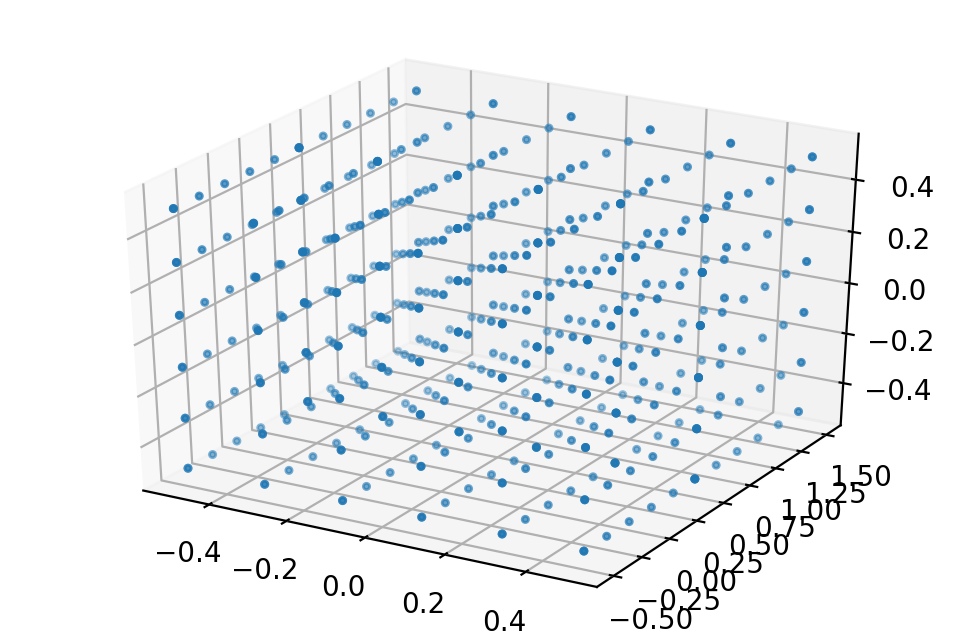

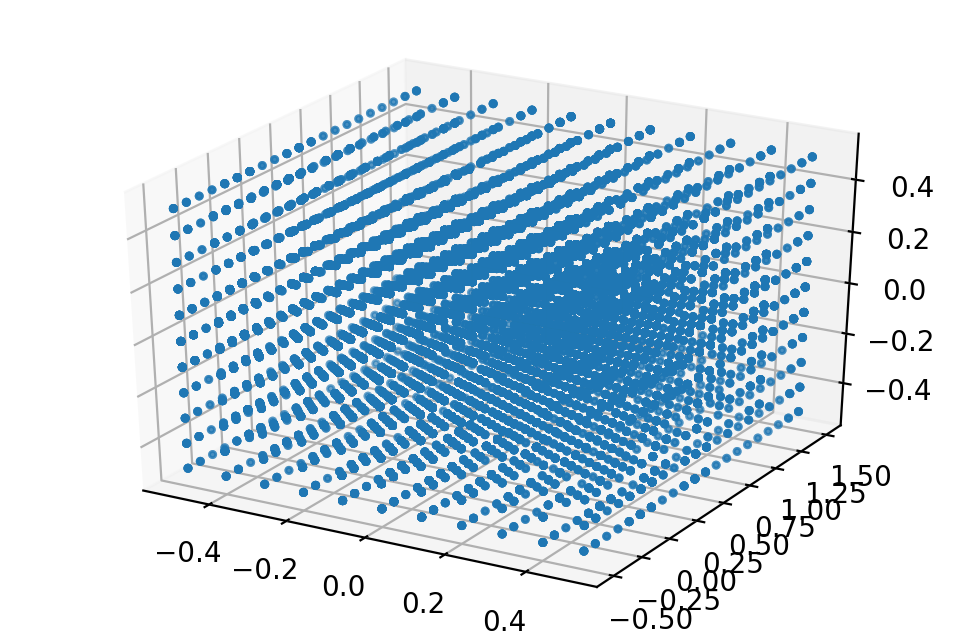

In [ ]:
ax1 = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = list(  (t_d[2])[:,3] )  #4th column (z values)
xdata = list(   (t_d[2])[:,1] )
ydata = list(   (t_d[2])[:,2] )
ax1.scatter3D(xdata, ydata, zdata, marker='.');
plt.show()

ax2 = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = list(  (ntd[2])[:,3] )  #4th column (z values)
xdata = list(   (ntd[2])[:,1] )
ydata = list(   (ntd[2])[:,2] )
ax2.scatter3D(xdata, ydata, zdata, marker='.');
plt.show()

In [ ]:
#print(  (t_d[2]))
print(    (t_d[2])[:,2]     )
print((t_d[2])[0:576][2])

[-0.5 -0.5 -0.3 -0.3 -0.5 -0.5 -0.3 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3
 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5 -0.5 -0.5 -0.3 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.3  0.3
  0.3  0.3  0.3  0.3  0.5  0.5  0.5  0.5  0.5  0.5 -0.5 -0.5 -0.3 -0.3
 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.3  0.3  0.3  0.3  0.3  0.3  0.5  0.5
  0.5  0.5  0.5  0.5 -0.5 -0.5 -0.3 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3
 -0.5 -0.3 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.3  0.3  0.3  0.3  0.3  0.3  0.5  0.5  0.5  0.5  0.5  0.5 -0.5 -0.5
 -0.3 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3 -0.5 -0.3 -0.1 -0.1 -0.1 -0.1
 -0.1 

In [ ]:
print(np.shape(t_d))

(31, 576, 11)


In [ ]:
n_t_d = []

for i in range (0,31):

  new_ts = []
  for j in range(0, np.shape(ntd)[1]):
    single_row = np.array([  (ntd[i])[j]   ])
    new_ts.append(single_row)

  new_arr = [tuple(row) for row in new_ts]
  uniques = np.unique(new_arr)

  n_t_d.append(uniques)

#new_td = np.stack(n_t_d)
print(np.shape(n_t_d))
print(n_t_d)

In [ ]:
#def rnn(neurons):
 # nn = keras.models.Sequential()
  #nn.add(keras.layers.LSTM(neurons, input_shape=(None,1),return_sequences=False)) # LSTM layer with 20 neurons
  #nn.add(keras.layers.Dense(1,activation="linear"))
  #nn.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
rnn = keras.models.Sequential()
rnn.add(keras.layers.LSTM(4, input_shape=(None,1),return_sequences=True)) # LSTM layer with 20 neurons
#rnn.add(keras.layers.Dense(25,activation="linear"))
rnn.add(keras.layers.Dense(3,activation="linear"))
rnn.add(keras.layers.Dense(2,activation="linear"))
rnn.add(keras.layers.Dense(1,activation="linear"))
rnn.compile(loss='mse',optimizer='adam')

rnn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, None, 4)           96        
                                                                 
 dense_23 (Dense)            (None, None, 3)           15        
                                                                 
 dense_24 (Dense)            (None, None, 2)           8         
                                                                 
 dense_25 (Dense)            (None, None, 1)           3         
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# too easy to predict pressure... so try with displacement

#print(np.shape(ts_disx))

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


def shapeArray(x,windowsize,offset):
   xInput= np.array([x[i : i + windowsize] for i in range(len(x)-(windowsize+offset)+1)])   #part of data for training
   xLabel= np.array([x[i +windowsize : i+ windowsize+offset] for i in range(len(x)-(windowsize+offset)+1)])  #label will be all of data?
   return (xInput,xLabel)


ts_disx_new = np.array(ts_disx).reshape(np.array(ts_disx).shape[0], 1)
dataX, dataY = create_dataset( ts_disx_new, 3)






yInput, yLabel = shapeArray(ts_disx, 3, 3)

print(yInput)
print(yLabel[:,0])
#print( ts_disx )

print(dataX)
print(dataY)

[[-9.0773e-09 -9.1733e-09 -9.2694e-09]
 [-9.1733e-09 -9.2694e-09 -9.1496e-09]
 [-9.2694e-09 -9.1496e-09 -9.0299e-09]
 [-9.1496e-09 -9.0299e-09 -9.1736e-09]
 [-9.0299e-09 -9.1736e-09 -9.3174e-09]
 [-9.1736e-09 -9.3174e-09 -9.1607e-09]
 [-9.3174e-09 -9.1607e-09 -9.0039e-09]
 [-9.1607e-09 -9.0039e-09 -9.1720e-09]
 [-9.0039e-09 -9.1720e-09 -9.3401e-09]
 [-9.1720e-09 -9.3401e-09 -9.1612e-09]
 [-9.3401e-09 -9.1612e-09 -8.9823e-09]
 [-9.1612e-09 -8.9823e-09 -9.1680e-09]
 [-8.9823e-09 -9.1680e-09 -9.3537e-09]
 [-9.1680e-09 -9.3537e-09 -9.1652e-09]
 [-9.3537e-09 -9.1652e-09 -8.9767e-09]
 [-9.1652e-09 -8.9767e-09 -9.1675e-09]
 [-8.9767e-09 -9.1675e-09 -9.3582e-09]
 [-9.1675e-09 -9.3582e-09 -9.1660e-09]
 [-9.3582e-09 -9.1660e-09 -8.9737e-09]
 [-9.1660e-09 -8.9737e-09 -9.1667e-09]
 [-8.9737e-09 -9.1667e-09 -9.3596e-09]
 [-9.1667e-09 -9.3596e-09 -9.1667e-09]
 [-9.3596e-09 -9.1667e-09 -8.9738e-09]
 [-9.1667e-09 -8.9738e-09 -9.1660e-09]
 [-8.9738e-09 -9.1660e-09 -9.3583e-09]]
[-9.1496e-09 -9.0299e-09

In [ ]:
#ts_time
#ts_disx
#ts_disx2
#model = rnn(20)

#train and test data:

def shapeArray(x,windowsize,offset):
    xInput= np.array([x[i : i + windowsize] for i in range(len(x)-(windowsize+offset)+1)])   #part of data for training
    xLabel= np.array([x[i +windowsize : i+ windowsize+offset] for i in range(len(x)-(windowsize+offset)+1)])  #label will be all of data?
    return (xInput,xLabel)





def normalise(array):
  return abs(np.array(array))  /  max(  abs(np.array(array))  )  #abs because some of the displacement data is negative

def denormalise(array):
  return array

min_og = min(ts_disy)
max_og = max(ts_disy)



scaler = MinMaxScaler(feature_range=(0, 1))
ts_disy = scaler.fit_transform(      np.array(ts_disy).reshape( np.array(ts_disy).shape[0] , 1  )    )


steps=200
costs=np.zeros(steps)


for i in tqdm(range(steps)):

  yInput, yLabel = shapeArray(   ts_disy[0:20]    , 3, 3)


  #yInput=  np.array(ts_disx[0:int(0.3*len(ts_disx))])  # Apply the sinexp function to xInput
  #yLabel=  np.array(ts_disx)  # Apply the sinexp function to xLabel

  # Now we need to reshape the array into batchsize * window size * features (1)
  y_in=yInput.reshape(yInput.shape[0],yInput.shape[1],1)  # Reshape the input array to have the dimensions (batchsize,time samples, features)
  # We only want a single number for the target (since we set return_sequences=False above). We will take the last sample of the yLabel
  y_target=yLabel[:,-1].reshape(yLabel.shape[0],1) # Reshape the output array to have the dimensions (batchsize, time samples)
  costs[i]=rnn.train_on_batch(y_in , y_target) #Train the network




100%|██████████| 200/200 [00:03<00:00, 64.63it/s] 


In [ ]:
#print(yInput.size)
#print(y_in)
#print(y_target)

print(np.size(ts_disx))

print(yInput.size)
print(yLabel.size)


print(yInput.shape)
print(yLabel.shape)

#print( (yInput-yLabel)**2 )

yInput, yLabel = shapeArray(ts_disx, 3, 3)

print(yInput)
print( ts_disx )

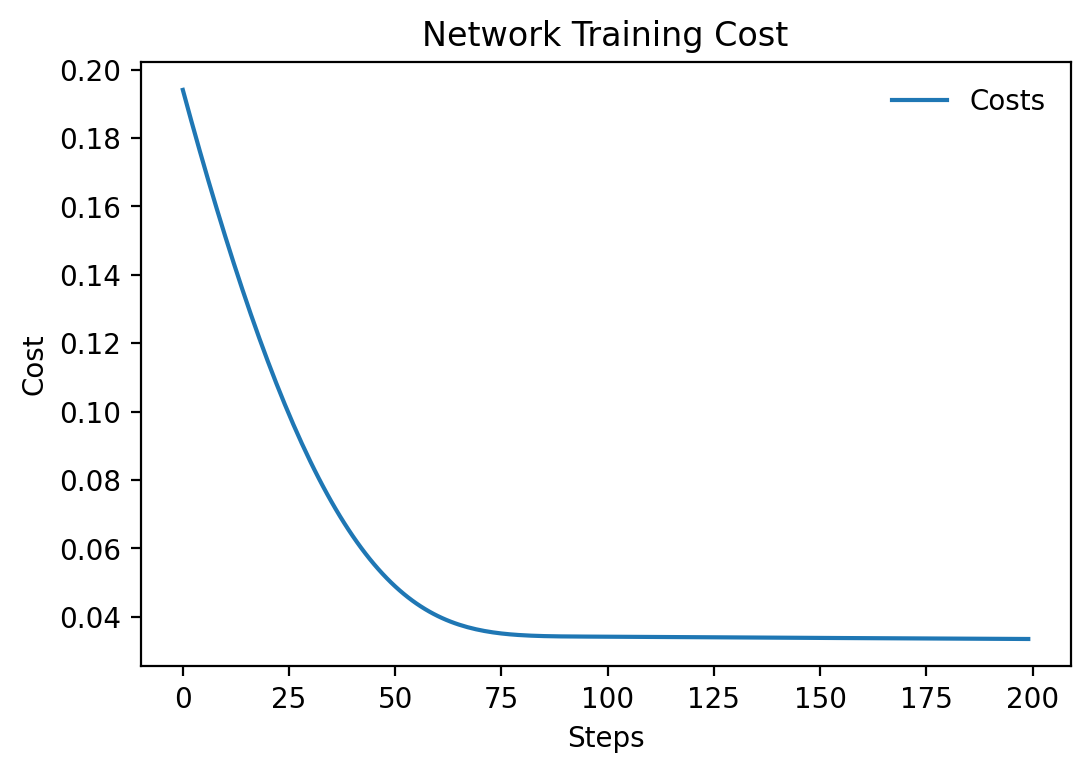

In [ ]:
#Plot costs vs steps
fig,ax=plt.subplots()
ax.plot(np.arange(steps),costs,label=r"Costs")
ax.set_xlabel("Steps")
ax.set_ylabel("Cost")
ax.set_title("Network Training Cost")
ax.legend()
#print(costs)

In [ ]:

windowsize=3

#ts_disz = normalise(ts_disz)

#yInput_trained, yLabel_trained = shapeArray(ts_disx[0:20], windowsize, windowsize)

#yTrain_in=yInput_trained.reshape(yInput_trained.shape[0],yInput_trained.shape[1],1)
#y_Trained=rnn.predict_on_batch(   yTrain_in.reshape(yTrain_in.shape[0],windowsize,1)   )




yInput_test, yLabel_test = shapeArray(ts_disy, windowsize, windowsize)

yTest_in=yInput_test.reshape(yInput_test.shape[0],yInput_test.shape[1],1)
y_Test=rnn.predict_on_batch(   yTest_in.reshape(yTest_in.shape[0],windowsize,1)   )



print(yTest_in.shape)
print(yLabel.shape)

(25, 3, 1)
(15, 3, 1)


In [ ]:
xInput, xLabel = shapeArray(ts_time, windowsize, windowsize)

scaler2 = MinMaxScaler(   feature_range=(min_og, max_og) )


#trainPredict = scaler.inverse_transform(       (y_Trained.reshape(y_Trained.shape[0], y_Trained.shape[1])[:,-1]).reshape( -1,1)        )
testPredict = scaler2.fit_transform(       (y_Test.reshape(y_Test.shape[0], y_Test.shape[1])[:,-1]).reshape( -1,1)        )



label = scaler.inverse_transform(yLabel_test.reshape( yLabel_test.shape[0], yLabel_test.shape[1]     )  )
input = scaler.inverse_transform(yInput_test.reshape( yInput_test.shape[0], yInput_test.shape[1]  )               )



#pred =    normalise(   ts_disz  ) * max(   y_hat.reshape(y_hat.shape[0])      )

#print (pred)

#print(  normalise(   y_hat.reshape(y_hat.shape[0])     )  )




#testPredict = scaler2.fit_transform(   testPredict   )
label = scaler2.fit_transform(   label   )
input = scaler2.fit_transform(   input   )
ts_disy = scaler2.fit_transform(   ts_disy   )

train_label = scaler2.fit_transform(        yLabel.reshape(  yLabel.shape[0], yLabel.shape[1] )     )




#trainPredictPlot = np.empty_like(ts_disx)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[windowsize:len(trainPredict)+windowsize, :] = trainPredict


#testPredictPlot = np.empty_like(ts_disx)
#testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(windowsize*2)+1:len(ts_disx)-1, :] = testPredict


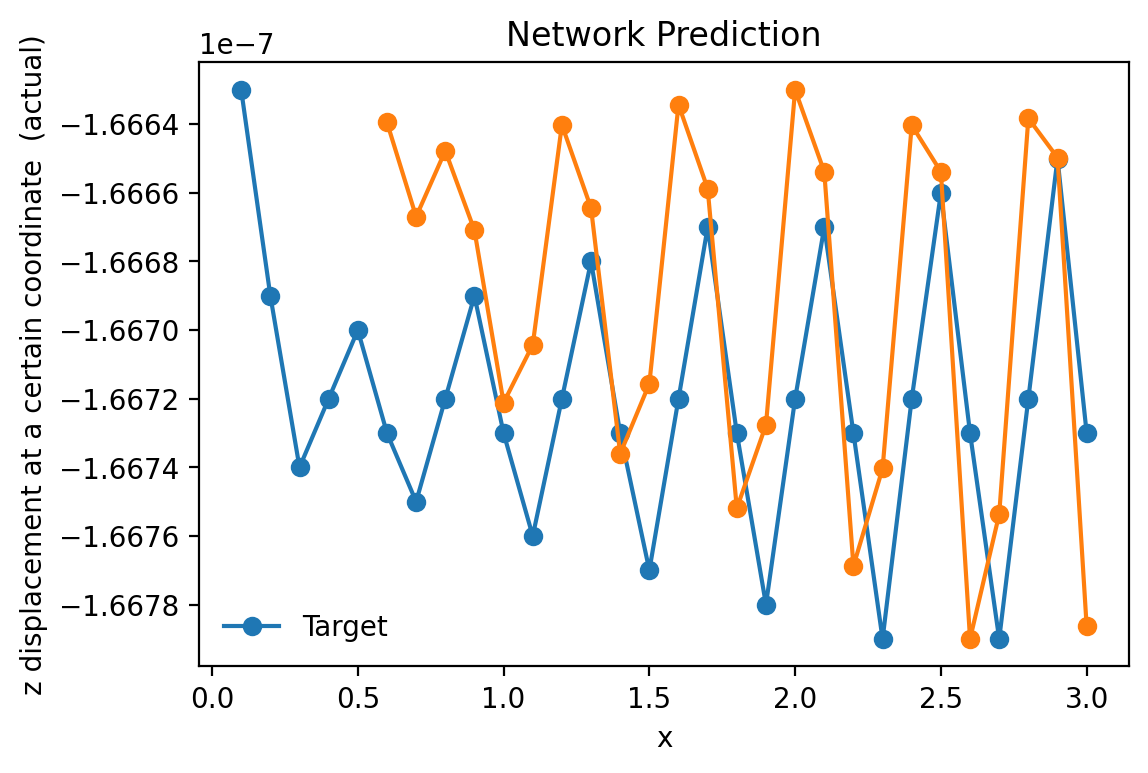

In [ ]:
fig,ax = plt.subplots()
ax.plot(ts_time,  ts_disy,'-o',label="Target")
#ax.plot(x_test[offset:],y_testoff,label=r"$y_{target}$")


#ax.plot(xLabel[0:15], train_label ,  '-o',label="Target")

ax.set_xlabel("x")
ax.set_ylabel("z displacement at a certain coordinate  (actual)")
ax.set_title("Network Prediction")
ax.legend()

#ax = ax.twinx()



ax.plot(ts_time[windowsize+windowsize-1:] , testPredict,  '-o'  , label=r"$y_{prediction}$")
#ax.set_ylabel("z displacement at a certain coordinate (predication)")

In [ ]:
print(y_hat.reshape(y_hat.shape[0], y_hat.shape[1]))

print(xInput)

[[0.45450372 0.4654878  0.4784499 ]
 [0.4576618  0.47036928 0.4758973 ]
 [0.46099916 0.4675388  0.46987855]
 [0.45686546 0.46196333 0.4724111 ]
 [0.45301667 0.46466488 0.47998422]
 [0.45767197 0.4720724  0.47694498]
 [0.4627373  0.4684934  0.46910048]
 [0.45723712 0.46131697 0.4718546 ]
 [0.45222437 0.46413997 0.4806319 ]
 [0.45761788 0.47285727 0.47724122]
 [0.4635789  0.46876323 0.46834132]
 [0.45725393 0.46066803 0.471262  ]
 [0.45157996 0.4636101  0.4809089 ]
 [0.4574828  0.47327963 0.47754502]
 [0.46408993 0.46904957 0.4681674 ]
 [0.45738846 0.4605559  0.47114235]
 [0.451415   0.4634897  0.48102504]
 [0.45746598 0.47343317 0.4776254 ]
 [0.4642602  0.46912536 0.46806493]
 [0.4574154  0.46047738 0.47105438]
 [0.45132703 0.4634077  0.48103914]
 [0.457439   0.47347024 0.4776666 ]
 [0.4643133  0.4691647  0.4680717 ]
 [0.457439   0.46049005 0.4710351 ]
 [0.45132995 0.46338668 0.48097804]]
[[0.1 0.2 0.3]
 [0.2 0.3 0.4]
 [0.3 0.4 0.5]
 [0.4 0.5 0.6]
 [0.5 0.6 0.7]
 [0.6 0.7 0.8]
 [0.7 0.8

In [ ]:
#COMMENTS:

#prediction graph is peroodic but is not "straight" between max and min periodicities... also prediction graph has a very small max and min range compared to inital data
#(possible reasons: not engough data between timestep=--- most likley. or something wrong w NN)

#normalising both inital training and testing datasets (ts_disx and ts_disz) doesnt help
#normalising and *max(ts_disx) doesnt help
#the below function would just make the 2 graphs the same

#so i've decided to stick with: doing nothing to the graphs but just having 2 seperate y axis so that I can see them together atleast




#MORE IDEAS:
#make 2 NNs... one for decreasing amplitiude... and the other for increasing !!!

[[-9.149801e-09]
 [-9.145649e-09]
 [-9.148499e-09]
 [-9.152872e-09]
 [-9.150172e-09]
 [-9.146078e-09]
 [-9.148868e-09]
 [-9.152793e-09]
 [-9.149945e-09]
 [-9.146115e-09]
 [-9.148975e-09]]


In [ ]:
def stretch(pred, orig):
  for i in pred:
    for j in orig:
      if i> max(pred)/2:
        i*( j/i   )

### this would just replace all of the values of pred for orig????.... so it would just remake the same

In [ ]:
class every_func:
    def __init__(self, inp_ydata, windowsize, offset, steps, input_nuerons, output_nuerons, time_data, dens_scale_factor, train_size  ):
      self.inp_ydata  = inp_ydata
      self.windowsize = windowsize
      self.offset = offset
      self.steps = steps
      self.input_nuerons = input_nuerons
      self.output_nuerons = output_nuerons
      self.time_data = time_data
      self.dens_scale_factor = dens_scale_factor
      self.train_size = train_size


    def interpolate(self):
      new_time = np.linspace(0, 3, self.dens_scale_factor*30 + 1)
      yinterp = np.interp(new_time, self.time_data, self.inp_ydata)

      return ([new_time, yinterp])


    def normalise(self):

        scaler = MinMaxScaler(feature_range=(0, 1))
        norm_arr = scaler.fit_transform(         np.array( self.interpolate()[1] ).reshape( np.array( self.interpolate()[1]).shape[0] , 1 )        )

        return norm_arr





    def shapeArray(self, arr):
        Input= np.array([arr[i : i + self.windowsize] for i in range(len(arr)-(self.windowsize + self.offset)+1)])   #part of data for training
        Label= np.array([arr[i + self.windowsize : i+ self.windowsize + self.offset] for i in range( len(arr) - (self.windowsize + self.offset)+1)])  #label will be all of data?
        return (Input,Label)







    def unormalise(self, arr):
        min_og = min(self.inp_ydata)
        max_og = max(self.inp_ydata)
        arr = np.array(arr)


        scaler2 = MinMaxScaler(   feature_range=(min_og, max_og)   )
        unorm_array = scaler2.fit_transform(    arr.reshape(    arr.shape[0], arr.shape[1]    )        )

        return unorm_array








    def network(self):
        rnn = keras.models.Sequential()
        rnn.add(keras.layers.LSTM(self.input_nuerons, input_shape=(None,1),return_sequences=True)) # LSTM layer with 20 neurons
        rnn.add(keras.layers.Dense(self.output_nuerons, activation="linear"))
        rnn.compile(loss='mse',optimizer='adam')

        #rnn.summary()

        return rnn


    def train_pred(self):
        costs=np.zeros(  self.steps  )

        rnn= self.network()



        for i in tqdm(range(     self.steps  )):
            yInput, yLabel = self.shapeArray(   self.normalise()[0: int(   self.train_size*len(  self.normalise()  ))  ])

            #yInput=  np.array(ts_disx[0:int(0.3*len(ts_disx))])  # Apply the sinexp function to xInput
            #yLabel=  np.array(ts_disx)  # Apply the sinexp function to xLabel

            # Now we need to reshape the array into batchsize * window size * features (1)
            y_in=yInput.reshape(yInput.shape[0],yInput.shape[1],1)  # Reshape the input array to have the dimensions (batchsize,time samples, features)
            # We only want a single number for the target (since we set return_sequences=False above). We will take the last sample of the yLabel
            y_target = yLabel[:,-1].reshape(yLabel.shape[0], 1) # Reshape the output array to have the dimensions (batchsize, time samples)

            costs[i] = rnn.train_on_batch(y_in , y_target) #Train the network




        yInput_test, yLabel_test = self.shapeArray(self.normalise())
        yTest_in = yInput_test.reshape(yInput_test.shape[0], yInput_test.shape[1], 1)

        y_Test = rnn.predict_on_batch(   yTest_in.reshape(yTest_in.shape[0], self.windowsize, 1)   )

        return ([costs, y_Test])



    def costplot(self, costs ):
        fig,ax=plt.subplots()
        ax.plot(  np.arange(self.steps),  costs,label=r"Costs")
        ax.set_xlabel("Steps")
        ax.set_ylabel("Cost")
        ax.set_title("Network Training Cost")
        ax.legend()



    def pred_plot(self, pred):

        fig,ax = plt.subplots()
        ax.plot(self.time_data,  self.inp_ydata,   label="Target")
        #ax.plot(x_test[offset:],y_testoff,label=r"$y_{target}$")

        ax.plot( self.time_data[0: int(self.train_size*len(self.time_data))],  self.inp_ydata[0: int(self.train_size*len(self.inp_ydata))]    ,label="Training Data")

        ax.set_xlabel("x")
        ax.set_ylabel("z displacement at a certain coordinate  (actual)")
        ax.set_title("Network Prediction")

        #ax = ax.twinx()



        ax.plot(          (    self.interpolate()[0]       )[   self.windowsize+self.offset-1:] , self.unormalise(pred)[:,-1] , label="Prediction")
        #ax.set_ylabel("z displacement at a certain coordinate (predication)")

        ax.legend()







In [ ]:
def everything(data, time_data, windowsize, offset, steps, input_nuerons, output_neurons, dens_scale_factor, train_size):
  net = every_func(data, windowsize, offset, steps, input_nuerons, output_neurons, time_data, dens_scale_factor, train_size)


  net.interpolate()
  #net.shapeArray(ts_disx)

  #net.network(4, 1)
  #net.train(0.6)

  train_pred = net.train_pred()
  net.costplot(   train_pred[0]   )

  #net.predict()

  net.pred_plot( train_pred[1] )






100%|██████████| 500/500 [00:06<00:00, 75.63it/s] 


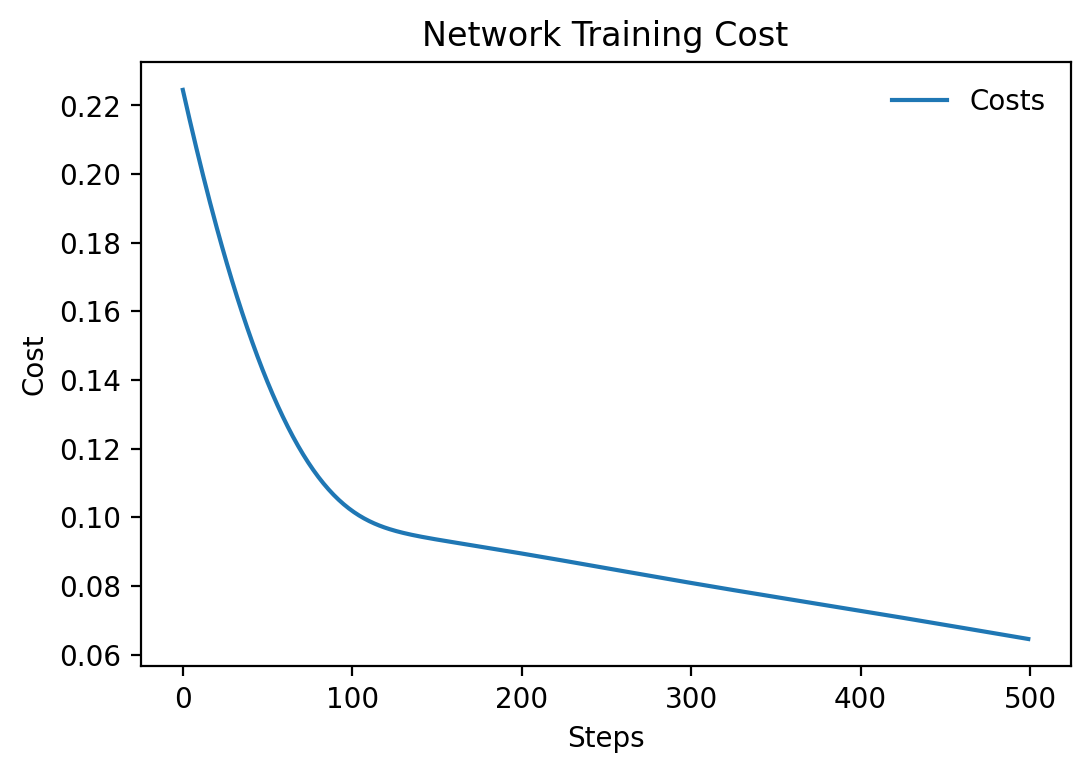

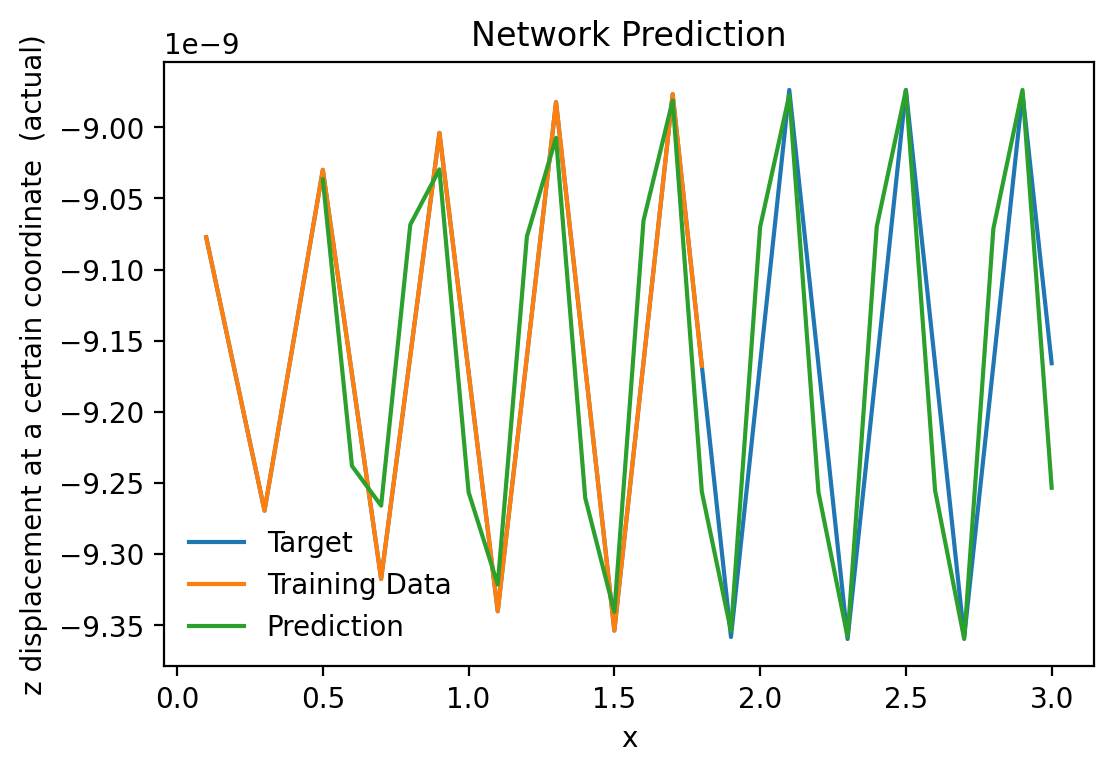

In [ ]:
everything(ts_disx, ts_time, 3, 3, 500, 4, 1, 1, 0.6)

In [ ]:
print(        np.linspace(0, 3, 31)     )

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


100%|██████████| 500/500 [00:07<00:00, 67.92it/s]


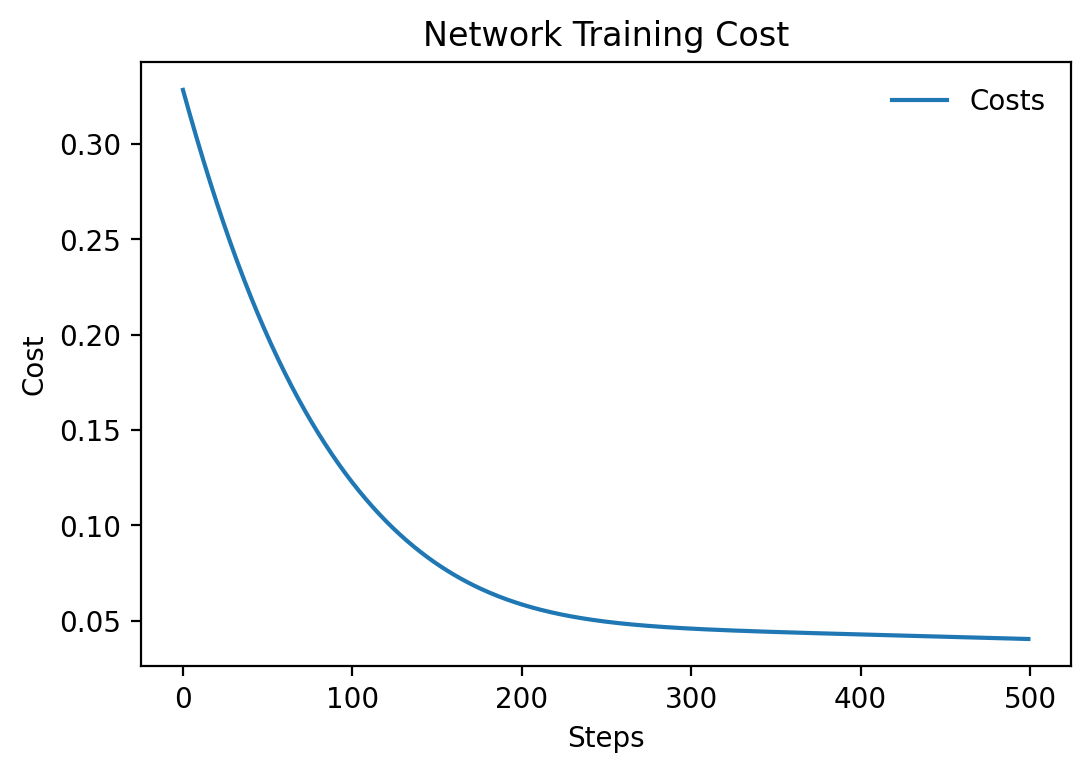

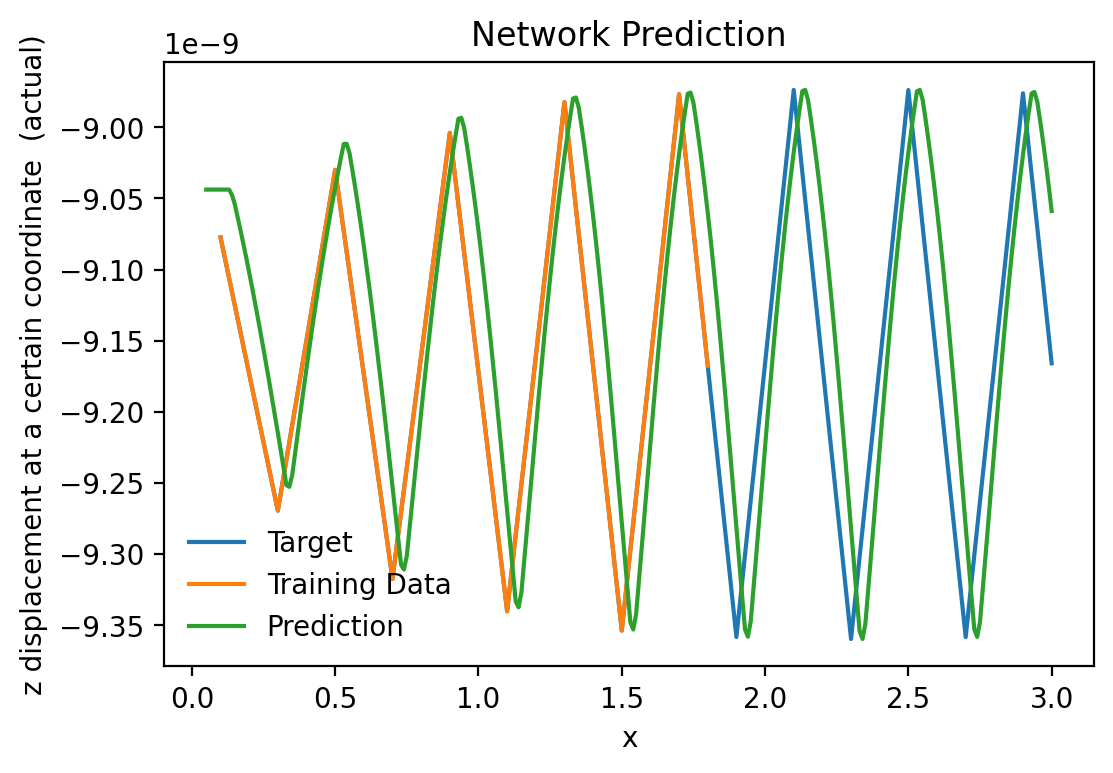

In [ ]:
everything(ts_disx, ts_time, 3, 3, 500, 4, 1, 10, 0.6)

100%|██████████| 500/500 [00:09<00:00, 53.34it/s]


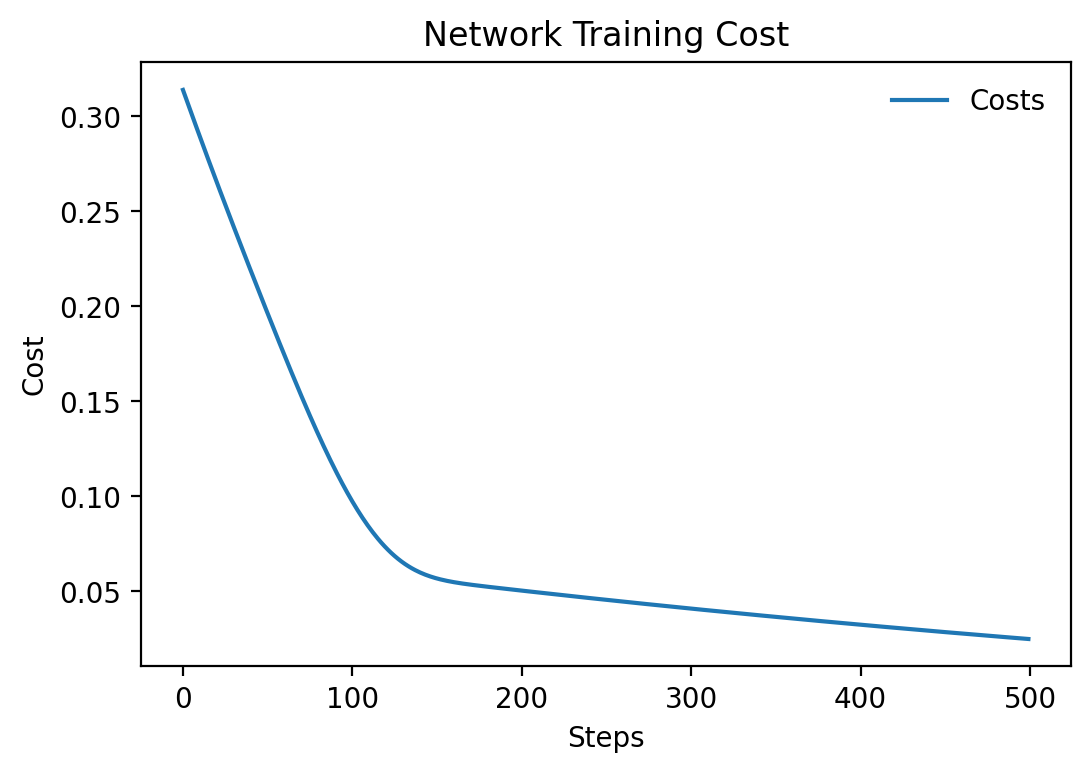

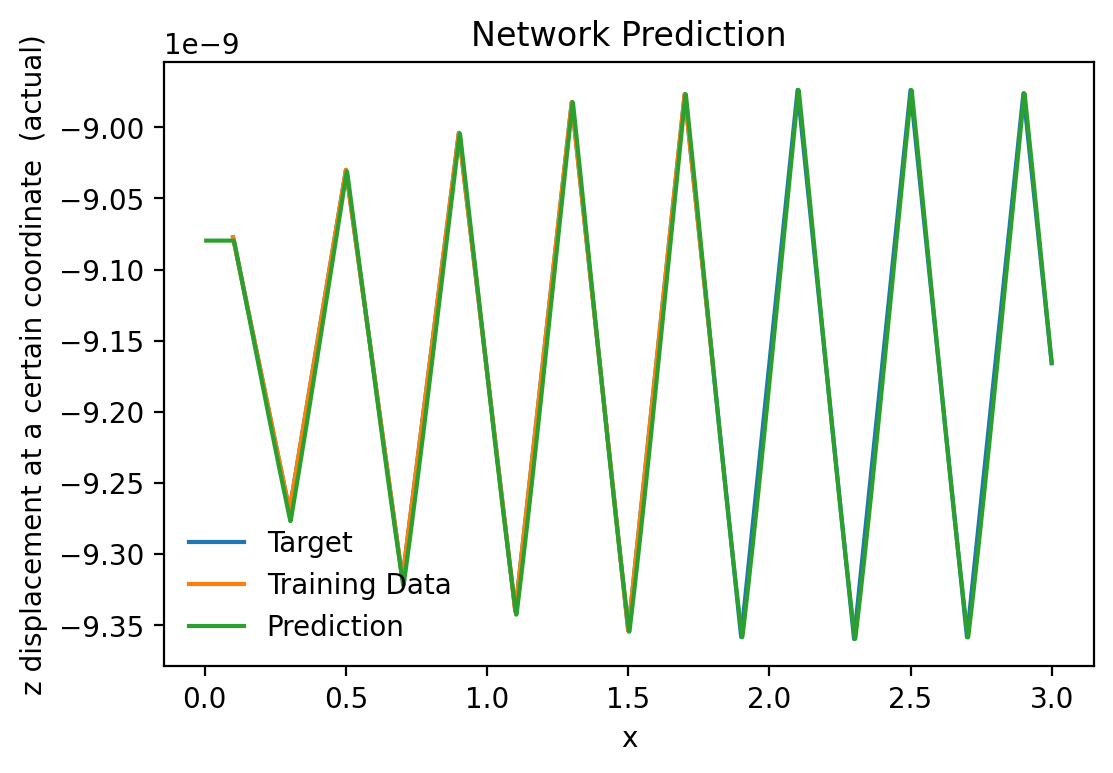

In [ ]:
everything(ts_disx, ts_time, 3, 3, 500, 4, 1, 100,  0.6)

100%|██████████| 500/500 [00:09<00:00, 53.57it/s]


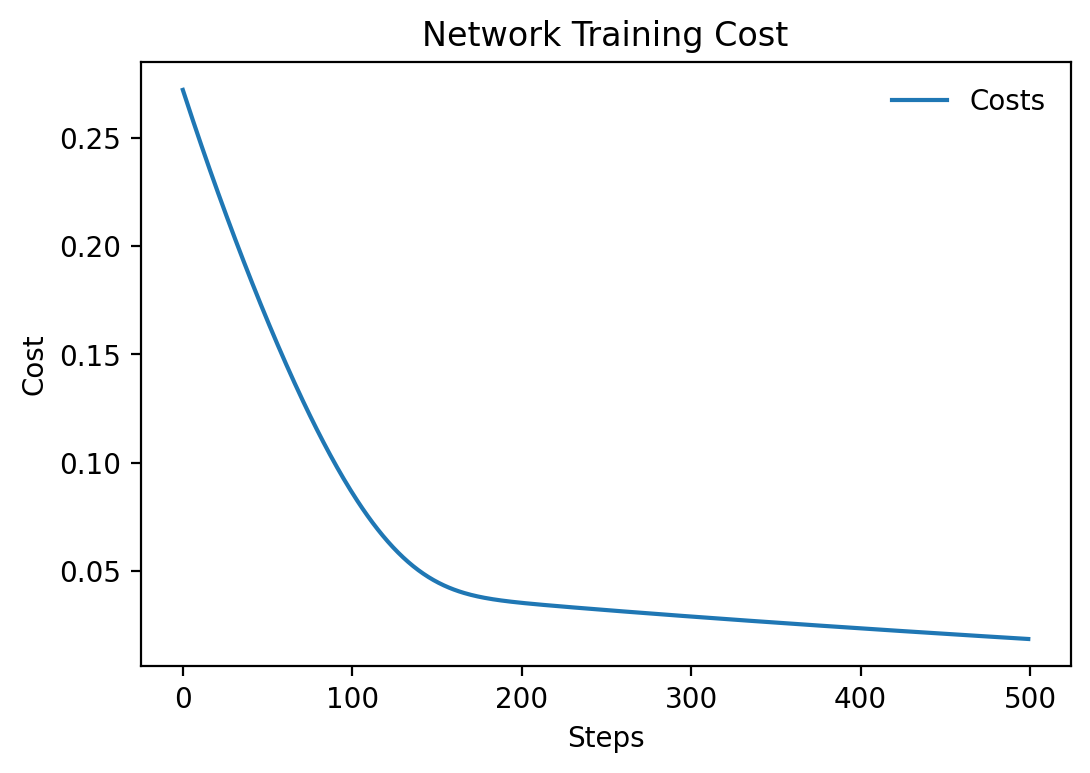

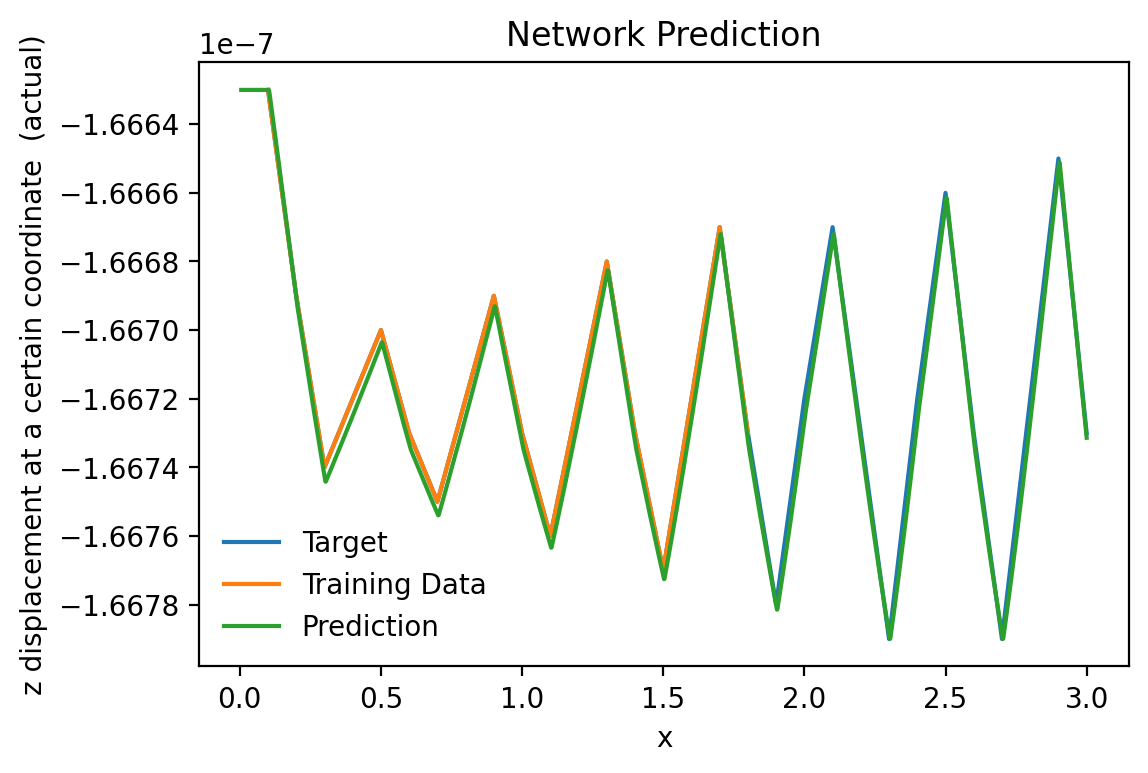

In [ ]:
everything(ts_disy, ts_time, 3, 3, 500, 4, 1, 100,  0.6)